In [3]:
import pandas as pd
import numpy as np

In [58]:
s = pd.Series([0.2, 0.4, 0.8, 1.5])

In [59]:
s

0    0.2
1    0.4
2    0.8
3    1.5
dtype: float64

In [60]:
s[0]

0.2

In [61]:
s[0:2]

0    0.2
1    0.4
dtype: float64

In [62]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [63]:
s.values

array([0.2, 0.4, 0.8, 1.5])

In [64]:
s1 = pd.Series([1, 2, 3, 4], index=["un", "deux", "trois", "quatre"])

In [65]:
s1["trois"]

3

In [66]:
s1[["trois", "quatre"]]  # correspond au SELECT

trois     3
quatre    4
dtype: int64

In [67]:
s1["un":"deux"]

un      1
deux    2
dtype: int64

In [68]:
s2 = pd.Series({"iris": "bleu", "tournesol": "rouge", "rose": "rose"})

In [69]:
s2

iris          bleu
tournesol    rouge
rose          rose
dtype: object

In [70]:
s1

un        1
deux      2
trois     3
quatre    4
dtype: int64

In [71]:
s1 < 3

un         True
deux       True
trois     False
quatre    False
dtype: bool

In [72]:
s1[s1 < 3]  # équivaut au WHERE en SQL

un      1
deux    2
dtype: int64

In [73]:
s1[["un", "deux", "trois"]][s1 < 2]

un    1
dtype: int64

In [74]:
s1 * 2

un        2
deux      4
trois     6
quatre    8
dtype: int64

In [75]:
np.exp(s1)

un         2.718282
deux       7.389056
trois     20.085537
quatre    54.598150
dtype: float64

In [76]:
"dix" in s1

False

In [77]:
"trois" in s1

True

In [78]:
s1

un        1
deux      2
trois     3
quatre    4
dtype: int64

In [79]:
s3 = pd.Series({"un": 5, "deux": 0, "dix": 10})

In [80]:
s3

un       5
deux     0
dix     10
dtype: int64

In [81]:
s4 = s1 + s3

In [82]:
s4

deux      2.0
dix       NaN
quatre    NaN
trois     NaN
un        6.0
dtype: float64

In [83]:
# NaN ça veut dire "Not A Number"

In [113]:
s4[s4.isnull()]

Series([], dtype: float64)

In [114]:
s4[s4.notnull()]

deux    2.0
un      6.0
dtype: float64

In [115]:
s4.dropna(inplace=True)

In [116]:
s4

deux    2.0
un      6.0
dtype: float64

In [117]:
mask = (s1 > 2) | (s1 < 2)
# "|" (operateur 'pipe' c'est un "OU" logique)
# "&" (ampersand / esperluette c'est un "ET" logique)
# > < <= >= != == ; vecteur.isin([]) ; "" in []

In [118]:
s1[mask]

un        1
trois     3
quatre    4
dtype: int64

## DataFrame

In [119]:
data = {
    "city": ["Paris", "Berlin", "Marseille", "Rome"],
    "population": [3000000, 3500000, 1500000, 2800000],
    "area": [105000, 819000, 240000, 1285000],
}

In [120]:
df = pd.DataFrame(data)

In [121]:
df

,city,population,area
0,Paris,3000000,105000
1,Berlin,3500000,819000
2,Marseille,1500000,240000
3,Rome,2800000,1285000


In [122]:
df["city"]

0        Paris
1       Berlin
2    Marseille
3         Rome
Name: city, dtype: object

In [123]:
type(df)

pandas.core.frame.DataFrame

In [124]:
type(df["city"])

pandas.core.series.Series

In [125]:
df

,city,population,area
0,Paris,3000000,105000
1,Berlin,3500000,819000
2,Marseille,1500000,240000
3,Rome,2800000,1285000


In [126]:
df.dtypes

city          object
population     int64
area           int64
dtype: object

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        4 non-null      object
 1   population  4 non-null      int64 
 2   area        4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [128]:
df.describe()

,population,area
count,4.000000e+00,4.000000e+00
mean,2.700000e+06,6.122500e+05
std,8.524475e+05,5.450415e+05
min,1.500000e+06,1.050000e+05
25%,2.475000e+06,2.062500e+05
50%,2.900000e+06,5.295000e+05
75%,3.125000e+06,9.355000e+05
max,3.500000e+06,1.285000e+06


```
_ _ _ _ _ _ _ _
```

```
_ _ _ _ 0 1 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ... _ _ _ _

```

"2020-01-01" > timestamp nombre de secondes écoulées depuis "1970-01-01"

2^32

In [129]:
df.values

array([['Paris', 3000000, 105000],
       ['Berlin', 3500000, 819000],
       ['Marseille', 1500000, 240000],
       ['Rome', 2800000, 1285000]], dtype=object)

In [130]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [131]:
df.columns

Index(['city', 'population', 'area'], dtype='object')

In [132]:
df.columns = ["city", "pop", "area"]  # permet de renommer une colonne

In [133]:
df

,city,pop,area
0,Paris,3000000,105000
1,Berlin,3500000,819000
2,Marseille,1500000,240000
3,Rome,2800000,1285000


In [134]:
df["density"] = df["pop"] / df["area"]

In [135]:
df

,city,pop,area,density
0,Paris,3000000,105000,28.571429
1,Berlin,3500000,819000,4.273504
2,Marseille,1500000,240000,6.250000
3,Rome,2800000,1285000,2.178988


In [136]:
df[["city", "density"]]

,city,density
0,Paris,28.571429
1,Berlin,4.273504
2,Marseille,6.250000
3,Rome,2.178988


In [137]:
df[df["density"] > 5][["city", "density"]]

,city,density
0,Paris,28.571429
2,Marseille,6.250000


In [138]:
df

,city,pop,area,density
0,Paris,3000000,105000,28.571429
1,Berlin,3500000,819000,4.273504
2,Marseille,1500000,240000,6.250000
3,Rome,2800000,1285000,2.178988


In [139]:
df.set_index("city", inplace=True)  # ou df = df.set_index ...

In [140]:
df

,pop,area,density
city,,,
Paris,3000000,105000,28.571429
Berlin,3500000,819000,4.273504
Marseille,1500000,240000,6.250000
Rome,2800000,1285000,2.178988


In [142]:
# pour récuperer la donnée dans une dataframe on a deux fonctions à disposition
# df.iloc[] index location  ; mémo : ça commencer par i donc c'est les index numériques
# df.loc[] ; mémo : ça commence par l donc c'est les labels

# loc = location


In [145]:
df.loc["Marseille", "density"]
#       ^ x (lignes)  ^ x (colonnes)      

6.25

In [148]:
df.loc[["Marseille", "Rome"], ["pop", "area"]]

,pop,area
city,,
Marseille,1500000,240000
Rome,2800000,1285000


In [150]:
df.loc[["Marseille", "Rome"], ["pop", "area"]]

,pop,area
city,,
Marseille,1500000,240000
Rome,2800000,1285000


In [153]:
df.loc["Marseille":"Rome", "pop":"area"]

,pop,area
city,,
Marseille,1500000,240000
Rome,2800000,1285000


In [155]:
df.loc["Marseille":"Rome", "area":]

,area,density
city,,
Marseille,240000,6.250000
Rome,1285000,2.178988


In [159]:
df.iloc[-1, -1]

2.178988326848249

In [158]:
df.iloc[1, 1]

819000

In [161]:
df.iloc[[0,-1]]

,pop,area,density
city,,,
Paris,3000000,105000,28.571429
Rome,2800000,1285000,2.178988


In [165]:
df.loc[df["density"] > 6, "area"]

city
Paris        105000
Marseille    240000
Name: area, dtype: int64

In [166]:
df[df["density"] > 6]["area"]

city
Paris        105000
Marseille    240000
Name: area, dtype: int64

In [168]:
df.sort_values("pop")

,pop,area,density
city,,,
Marseille,1500000,240000,6.250000
Rome,2800000,1285000,2.178988
Paris,3000000,105000,28.571429
Berlin,3500000,819000,4.273504


In [169]:
df.sort_values("pop", ascending=False)

,pop,area,density
city,,,
Berlin,3500000,819000,4.273504
Paris,3000000,105000,28.571429
Rome,2800000,1285000,2.178988
Marseille,1500000,240000,6.250000


In [171]:
df.sort_index(ascending=False)

,pop,area,density
city,,,
Rome,2800000,1285000,2.178988
Paris,3000000,105000,28.571429
Marseille,1500000,240000,6.250000
Berlin,3500000,819000,4.273504


## Premier exercice : les prenoms

In [174]:
df = pd.read_csv("prenoms.csv", sep=";")  # CSV : Comma separated value (,)

In [175]:
df.head()

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12467 entries, 0 to 12466
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   prenom  12465 non-null  object
 1   genre   12467 non-null  object
 2   nb      12467 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 292.3+ KB


### Combien de personnes concernées par le dataset

In [180]:
df["nb"].sum()

526989

In [181]:
sum(df["nb"])  # ok mais moins optimisé pour des gros volumes

526989

### Combien de prénoms F et de prénoms M ?

In [183]:
df["genre"].count()

12467

In [187]:
df[df.genre == "M"]["nb"].count()

6581

In [189]:
df[df.genre == "F"]["nb"].count()

5886

#### Avec un groupby

In [190]:
df.groupby("genre")["nb"].count()
#
# SELECT COUNT(nb)
# FROM prenoms
# GROUP BY genre

genre
F    5886
M    6581
Name: nb, dtype: int64

In [191]:
df["genre"].value_counts()

M    6581
F    5886
Name: genre, dtype: int64

In [196]:
df["genre"].unique()
# SELECT DISTINCT(genre)
# FROM prenom

['M' 'F']


In [194]:
df["genre"].nunique()

2

### Combien y'a-t-il de prénoms androgynes?

In [200]:
df.groupby(["prenom", "genre"]).count()

,,nb
prenom,genre,
A Dominique,M,1
A Marie,F,1
A-Claude,F,1
A. Caroline,F,1
A. Marie,F,1
...,...,...
Éric,M,1
Érika,F,1
Étienne,M,1


In [242]:
male_firstnames = df[(df.genre == "M") & (df.nb > 100)]["prenom"]

In [243]:
male_firstnames

0                      Michel
1                       Alain
2                    Philippe
3                     Bernard
4                   Christian
                 ...         
12455             Elefthérios
12456    Patrice Bernard Jean
12457                  Desire
12461            Pierre Emile
12462               F.Jacques
Name: prenom, Length: 6581, dtype: object

In [246]:
df[(df.genre == "F") & (df["prenom"].isin(male_firstnames))]

,prenom,genre,nb
22,Catherine,F,4389
23,Françoise,F,4334
24,Isabelle,F,4295
26,Sylvie,F,4197
28,Martine,F,4094
...,...,...,...
12202,Etienne,F,1
12248,Andrew,F,1
12342,Elen,F,1
12427,Maialen,F,1


#### Seconde solution

In [228]:
duplicate_prenom = df["prenom"].value_counts()

In [229]:
(duplicate_prenom >= 2).sum()

746

In [223]:
duplicate_prenom[duplicate_prenom >= 2]

Janick      2
Frédéric    2
Leda        2
Nicolas     2
Cécile      2
           ..
Mario       2
Valérie     2
Gill        2
Ludivine    2
Marjorie    2
Name: prenom, Length: 746, dtype: int64

## Trouver le prénom le plus long

In [264]:
max([(prenom, len(prenom)) for prenom in df["prenom"].dropna().unique()], key=lambda x: x[1])

('Christiane, Victoire Marie-Emm', 30)

```
[
    (Christophe, 10),
    (Alain, 5),
    ....
]
```

#### Solution la plus élégante et optimisée

In [267]:
df["len_prenom"] = df["prenom"].str.len()

In [269]:
df.sort_values("len_prenom", ascending=False)

,prenom,genre,nb,len_prenom
4874,"Christiane, Victoire Marie-Emm",F,1,30.0
6750,Emilienne Marieta Atea Vahine,F,1,29.0
12231,Marie Lamberte Dite Alisette,F,1,28.0
11671,Freddy Tapunui Vane Dit Coco,M,1,28.0
4601,Law De Lauriston De Boubers,M,1,27.0
...,...,...,...,...
2690,Jo,M,3,2.0
8898,Ma,M,1,2.0
12016,Lu,F,1,2.0
2090,NaN,M,5,NaN


#### Solution alternative ok

In [276]:
df["len_prenom_2"] = df["prenom"].fillna("").apply(len)

# df["len_prenom_2"] = df["prenom"].fillna("").apply(lambda x: len(x))

In [275]:
df.sort_values("len_prenom_2", ascending=False)

,prenom,genre,nb,len_prenom,len_prenom_2
4874,"Christiane, Victoire Marie-Emm",F,1,30.0,30
6750,Emilienne Marieta Atea Vahine,F,1,29.0,29
11671,Freddy Tapunui Vane Dit Coco,M,1,28.0,28
12231,Marie Lamberte Dite Alisette,F,1,28.0,28
11579,Sophie Yvonne Rosalie Marie,F,1,27.0,27
...,...,...,...,...,...
2690,Jo,M,3,2.0,2
8898,Ma,M,1,2.0,2
8005,Ge,M,1,2.0,2
2090,NaN,M,5,NaN,0


In [284]:
df["prenom"].fillna("").apply(len)  # f(x) = x + 1

0        6
1        5
2        8
3        7
4        9
        ..
12462    9
12463    6
12464    6
12465    6
12466    8
Name: prenom, Length: 12467, dtype: int64

## Explication du inplace

In [295]:
df = df.set_index("prenom")

,genre,nb,len_prenom
prenom,,,
Michel,M,14136,6.0
Alain,M,10646,5.0
Philippe,M,9903,8.0
Bernard,M,8992,7.0
Christian,M,8102,9.0
...,...,...,...
F.Jacques,M,1,9.0
Frédie,F,1,6.0
Efisia,F,1,6.0


In [297]:
# ou on peut aussi faire
df.set_index("prenom", inplace=True)

In [299]:
df.reset_index(inplace=True)

In [300]:
df

,prenom,genre,nb,len_prenom
0,Michel,M,14136,6.0
1,Alain,M,10646,5.0
2,Philippe,M,9903,8.0
3,Bernard,M,8992,7.0
4,Christian,M,8102,9.0
...,...,...,...,...
12462,F.Jacques,M,1,9.0
12463,Frédie,F,1,6.0
12464,Efisia,F,1,6.0
12465,Cosima,F,1,6.0


## Les jointures

In [285]:
# En pandas on fait des jointures avec df.merge (ou df.join) mais je préfère df.merge

In [286]:
df

,prenom,genre,nb,len_prenom,len_prenom_2
0,Michel,M,14136,6.0,6
1,Alain,M,10646,5.0,5
2,Philippe,M,9903,8.0,8
3,Bernard,M,8992,7.0,7
4,Christian,M,8102,9.0,9
...,...,...,...,...,...
12462,F.Jacques,M,1,9.0,9
12463,Frédie,F,1,6.0,6
12464,Efisia,F,1,6.0,6
12465,Cosima,F,1,6.0,6


In [289]:
df.drop("len_prenom_2", axis=1, inplace=True)

# mémo : axis = 1 ; 1 ---> | ----> vertical ---> colonne
# memo : axis = 0 ; c'est le contraire de l'autre donc les lignes

KeyError: "['len_prenom_2'] not found in axis"

In [291]:
df.head(10)

,prenom,genre,nb,len_prenom
0,Michel,M,14136,6.0
1,Alain,M,10646,5.0
2,Philippe,M,9903,8.0
3,Bernard,M,8992,7.0
4,Christian,M,8102,9.0
5,Daniel,M,7821,6.0
6,Gérard,M,7009,6.0
7,Jean-Pierre,M,6945,11.0
8,Patrick,M,6884,7.0
9,Pierre,M,6711,6.0


In [301]:
reference = pd.DataFrame({
    "genre": ["M", "F", "O"],
    "genre_label": ["Male", "Female", "Other"],
})

In [302]:
reference

,genre,genre_label
0,M,Male
1,F,Female
2,O,Other


In [303]:
df.merge(reference, left_on="genre", right_on="genre")

,prenom,genre,nb,len_prenom,genre_label
0,Michel,M,14136,6.0,Male
1,Alain,M,10646,5.0,Male
2,Philippe,M,9903,8.0,Male
3,Bernard,M,8992,7.0,Male
4,Christian,M,8102,9.0,Male
...,...,...,...,...,...
12462,Kimberley,F,1,9.0,Female
12463,Frédie,F,1,6.0,Female
12464,Efisia,F,1,6.0,Female
12465,Cosima,F,1,6.0,Female


In [307]:
df.iloc[:20, 1] = "U"

In [314]:
df.merge(reference, left_on="genre", right_on="genre", how="left")
# pour afficher l'aide je fais Maj + Tab avec le curseur sur la fonction

,prenom,genre,nb,len_prenom,genre_label
0,Michel,U,14136,6.0,NaN
1,Alain,U,10646,5.0,NaN
2,Philippe,U,9903,8.0,NaN
3,Bernard,U,8992,7.0,NaN
4,Christian,U,8102,9.0,NaN
...,...,...,...,...,...
12462,F.Jacques,M,1,9.0,Male
12463,Frédie,F,1,6.0,Female
12464,Efisia,F,1,6.0,Female
12465,Cosima,F,1,6.0,Female


## Datavisualization

In [318]:
import matplotlib

<AxesSubplot:ylabel='genre'>

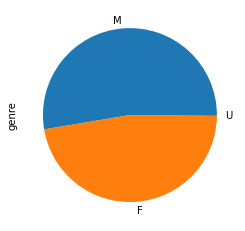

In [319]:
df["genre"].value_counts().plot(kind="pie")

<AxesSubplot:>

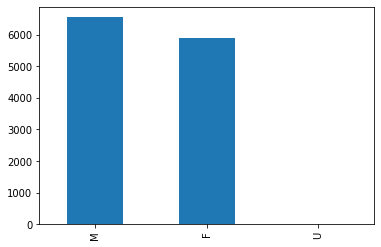

In [320]:
df["genre"].value_counts().plot(kind="bar")

<AxesSubplot:>

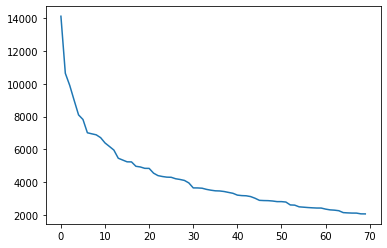

In [324]:
df[df["nb"] > 2000]["nb"].plot()

genre
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
U    AxesSubplot(0.125,0.125;0.775x0.755)
Name: nb, dtype: object

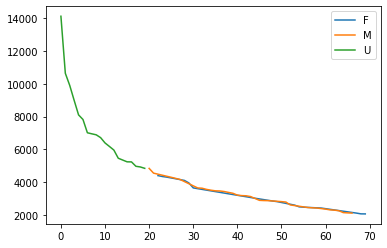

In [342]:
df[df["nb"] > 2000].groupby("genre")["nb"].plot(legend=True)

genre
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: len_prenom, dtype: object

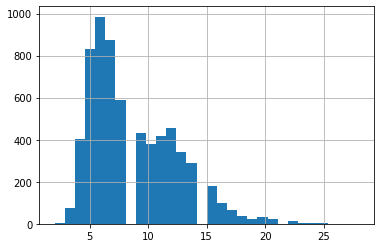

In [353]:
df[df["genre"] == "M"].groupby("genre")["len_prenom"].hist(bins=30)

genre
F    AxesSubplot(0.125,0.125;0.775x0.755)
Name: len_prenom, dtype: object

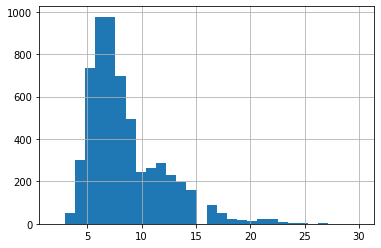

In [354]:
df[df["genre"] == "F"].groupby("genre")["len_prenom"].hist(bins=30)

In [355]:
df

,prenom,genre,nb,len_prenom
0,Michel,U,14136,6.0
1,Alain,U,10646,5.0
2,Philippe,U,9903,8.0
3,Bernard,U,8992,7.0
4,Christian,U,8102,9.0
...,...,...,...,...
12462,F.Jacques,M,1,9.0
12463,Frédie,F,1,6.0
12464,Efisia,F,1,6.0
12465,Cosima,F,1,6.0


## Exercice analyse population

In [4]:
import matplotlib

In [5]:
df = pd.read_csv("population.csv")

In [6]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105000.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530000.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784000.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2879000.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,77000.0,NaN


## Afficher l'évolution de la population française entre 1960 et 2017

In [13]:
df.loc[df["Country Name"] == "France", "1960":"2017"].T.plot()

KeyError: 'Country Name'

In [8]:
df.set_index("Country Name", inplace=True)

<AxesSubplot:>

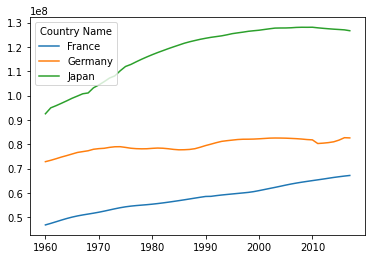

In [17]:
df.loc[["France", "Germany", "Japan"], "1960":"2017"].T.plot()

## Afficher dans un graphique 4x4 l'évolution des 16 pays les plus peuplés en 1960

In [20]:
pd.set_option('display.max_rows', 50)
df.sort_values("1960", ascending=False)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
World,WLD,"Population, total",SP.POP.TOTL,3.034193e+09,3.075115e+09,3.127961e+09,3.192794e+09,3.258201e+09,3.324952e+09,3.394865e+09,...,6.847215e+09,6.930657e+09,7.012844e+09,7.097401e+09,7.182860e+09,7.268986e+09,7.355220e+09,7.442136e+09,7.523997e+09,NaN
IDA & IBRD total,IBT,"Population, total",SP.POP.TOTL,2.301898e+09,2.331636e+09,2.374689e+09,2.429878e+09,2.485749e+09,2.543191e+09,2.604312e+09,...,5.725607e+09,5.801349e+09,5.877978e+09,5.955532e+09,6.033915e+09,6.112778e+09,6.191917e+09,6.271593e+09,6.348082e+09,NaN
Low & middle income,LMY,"Population, total",SP.POP.TOTL,2.279584e+09,2.309160e+09,2.352010e+09,2.406932e+09,2.462536e+09,2.519876e+09,2.581011e+09,...,5.705229e+09,5.781145e+09,5.857845e+09,5.935501e+09,6.014016e+09,6.093020e+09,6.172291e+09,6.252106e+09,6.328725e+09,NaN
Middle income,MIC,"Population, total",SP.POP.TOTL,2.124914e+09,2.151091e+09,2.190460e+09,2.241781e+09,2.293605e+09,2.346946e+09,2.403852e+09,...,5.160329e+09,5.221138e+09,5.282272e+09,5.343924e+09,5.406029e+09,5.468260e+09,5.530432e+09,5.592833e+09,5.651718e+09,NaN
IBRD only,IBD,"Population, total",SP.POP.TOTL,1.919408e+09,1.939836e+09,1.973218e+09,2.018350e+09,2.063747e+09,2.110280e+09,2.160019e+09,...,4.383581e+09,4.427798e+09,4.472296e+09,4.517417e+09,4.562691e+09,4.607808e+09,4.652578e+09,4.697247e+09,4.738332e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Martin (French part),MAF,"Population, total",SP.POP.TOTL,4.279000e+03,4.453000e+03,4.566000e+03,4.656000e+03,4.748000e+03,4.841000e+03,4.936000e+03,...,2.982000e+04,3.023500e+04,3.061500e+04,3.095900e+04,3.126400e+04,3.153000e+04,3.175400e+04,3.194900e+04,NaN,NaN
Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.674000e+06,NaN


In [18]:
isocodes = pd.read_csv("iso_3_v1.csv")

In [19]:
isocodes.head()

,Isocode,Country Name
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands


In [23]:
world_population = df.merge(isocodes, left_on="Country Code", right_on="Isocode", how="inner").set_index("Country Name")

In [37]:
data_16 = world_population.sort_values("1960", ascending=False).iloc[:16,3:-2].T

In [39]:
data_16.head()

Country Name,China,India,United States of America,Russian Federation,Japan,Indonesia,Germany,Brazil,United Kingdom of Great Britain and Northern Ireland,Italy,Bangladesh,France,Nigeria,Pakistan,Ukraine,Mexico
1960,667070000.0,449480608.0,180671000.0,119897000.0,92500572.0,87792515.0,72814900.0,72207554.0,52400000.0,50199700.0,48199747.0,46814237.0,45137812.0,44908293.0,42662149.0,38174112.0
1961,660330000.0,458494963.0,183691000.0,121236000.0,94943000.0,90138235.0,73377632.0,74351763.0,52800000.0,50536350.0,49592802.0,47444751.0,46062905.0,45984892.0,43203635.0,39394126.0
1962,665770000.0,467852537.0,186538000.0,122591000.0,95832000.0,92558005.0,74025784.0,76573248.0,53250000.0,50879450.0,51030137.0,48119649.0,47029140.0,47119361.0,43749470.0,40649588.0
1963,682335000.0,477527970.0,189242000.0,123960000.0,96812000.0,95055665.0,74714353.0,78854019.0,53650000.0,51252000.0,52532417.0,48803680.0,48032246.0,48309315.0,44285899.0,41939880.0
1964,698355000.0,487484535.0,191889000.0,125345000.0,97826000.0,97638029.0,75318337.0,81168654.0,54000000.0,51675350.0,54129100.0,49449403.0,49066059.0,49551904.0,44794327.0,43264272.0


In [34]:
import matplotlib.pyplot as plt

```
N   x y
0 : 0 0
1 : 0 1
2 : 0 2
3 : 0 3
4 : 1 0
5 : 1 1
    
x = N // 4
y = N % 4
```

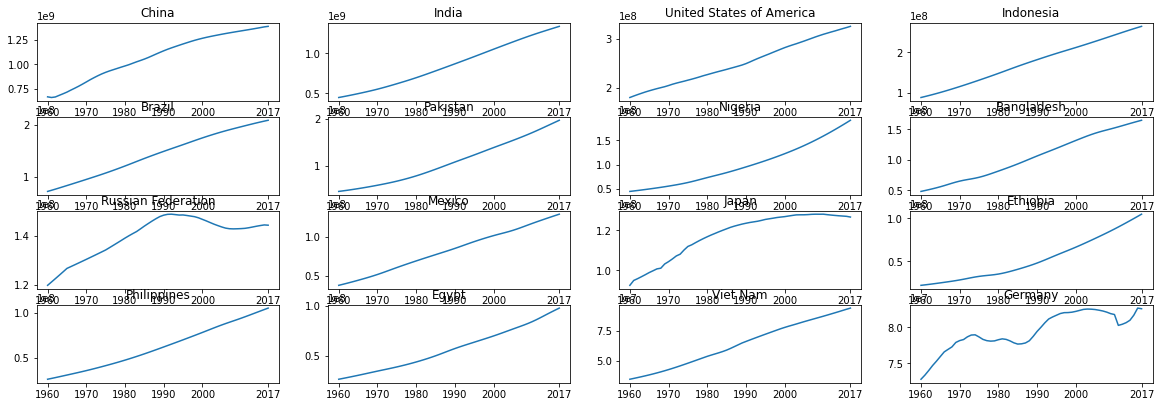

In [75]:
data_16 = world_population.sort_values("2017", ascending=False).iloc[:16,3:-2].T

fig, axs = plt.subplots(4, 4, figsize=(20,10))
# for i in range(16):
#    axs[i // 4, i % 4].plot(data_16.iloc[:,i])
#    axs[i // 4, i % 4].set_title(data_16.columns[i])

for i, col in enumerate(data_16.columns):
    axs[i // 4, i % 4].plot(data_16.loc[:,col])
    axs[i // 4, i % 4].set_title(col)

plt.setp(axs, xticks=["1960", "1970", "1980", "1990", "2000", "2017"])
plt.subplots_adjust(top=1, bottom=0.5)
plt.savefig("top16.jpg")